In [27]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc


In [16]:
# Reading Test Data
X_test = pd.read_csv("DataSet/test_data/test-data.csv")
y_test = pd.read_csv("DataSet/test_data/test-data-output.csv")
# One hot encoding for test_data target
y_encoded = LabelEncoder().fit_transform(y_test.values.reshape(-1))
# Loading Model
model = joblib.load("Model/trained-model.model")
# Dropping the ID Column
X_test.drop("ID", axis=1, inplace=True)
# Predicting the values
predicted_values = model.predict(X_test)
# Checking accuracy
acc_score = accuracy_score(y_encoded, predicted_values)
round(acc_score*100, 2)

91.43

In [25]:
# Measuring AUC
fpr, tpr, _ = roc_curve(y_encoded, predicted_values)
print("AUC = %.2f" %(auc(fpr, tpr)))

AUC = 0.92


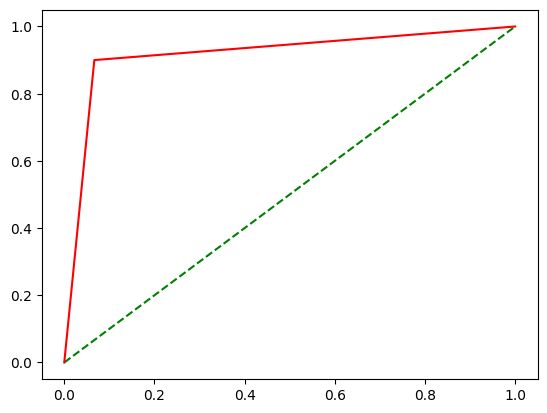

In [32]:
# Plotting ROC Curve
plt.plot([0, 1], [0, 1], linestyle="--", color="green") 
plt.plot(fpr, tpr, color="red")
plt.show()